## 1 Úkol

In [82]:
# zadáni 4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import cm

Import dat, kde poslední sloupec tvoří mnou zjištěné hodnoty.

In [83]:
# data 1
city = np.array(['big', 'big', 'medium', 'medium', 'medium', 'small', 'small', 'small'])
cat = np.array(
    ['Praha', 'Brno', 'Znojmo', 'Tišnov', 'Rokytnice nad Jizerou', 'Jablunkov', 'Dolní Věstonice', 'student'])
count = np.array([1327, 915, 681, 587, 284, 176, 215, 21])
winter = np.array([510, 324, 302, 257, 147, 66, 87, 11])
summer = np.array([352, 284, 185, 178, 87, 58, 65, 4])
change = np.array([257, 178, 124, 78, 44, 33, 31, 4])
indifferent = np.array([208, 129, 70, 74, 6, 19, 32, 2])


Pro zjištění rovnosti procentuálního zastoupení obyvatel měst použijeme test dobré shody.
H_0 : p_1 = p_2 ... = p_8

In [84]:

def chi_test(str, cat, count, dof=1):
    #print("got: ", cat.astype(int), "\nexp: ", (([cat.sum() / count.sum()] * len(count)) * count).astype(int), '\n')
    print(str, stats.chisquare(cat, f_exp=([cat.sum() / count.sum()] * len(count)) * count, ddof=dof))


chi_test("winter", winter, count)
chi_test("summer", summer, count)
chi_test("change", change, count)
print("critical value: ", stats.chi2.ppf(0.95, 6))

winter Power_divergenceResult(statistic=21.310706163566906, pvalue=0.001613039676565202)
summer Power_divergenceResult(statistic=7.299595273038772, pvalue=0.2940271928800054)
change Power_divergenceResult(statistic=12.346058276016716, pvalue=0.05467923612892293)
critical value:  12.591587243743977


Pro zimní čas zamítamé H_0 (p < 0.05), tudíž se percentuální zastoupení mezi městy liší.
Pro změnu času a letní čas H_0 nezamítamé.

Pro zjištění rovnosti procentuálního zastoupení mezi různě velkými městy (velké, střední, malé) použijeme obdobný test nad seskupenými daty.

In [85]:
# group by city
city_group = pd.DataFrame({'city': city, 'count': count, 'winter': winter, 'indifferent': indifferent})
city_group = city_group.groupby('city').sum()

chi_test("group_winter", city_group['winter'], city_group['count'])
chi_test("group_indifferent", city_group['indifferent'], city_group['count'])

group_winter Power_divergenceResult(statistic=15.616786433175259, pvalue=7.756296276494824e-05)
group_indifferent Power_divergenceResult(statistic=20.57102536251306, pvalue=5.745922029341851e-06)


H_0 zamítáme jak pro zimní čas, tak pro nerozhodnuté obyvatele.

Pro odhadnutí z které skupiny student pocházi (velké, střední, malé) použijeme opět chi^2 test. Očekávané hodnoty pro tuto analýzu tvoři bodový odhad z daných skupin.

In [86]:
city_group = pd.DataFrame(
    {'city': city, 'cat': cat, 'count': count, 'winter': winter, 'summer': summer, 'change': change,
     'indifferent': indifferent})
city_group = city_group[city_group['cat'] != 'student']
city_group = city_group.drop('cat', axis=1)

city_group = city_group.groupby(['city']).sum()
city_group.loc['student'] = [count[-1], winter[-1], summer[-1], change[-1], indifferent[-1]]
# separate count column
counts = city_group['count']
city_group = city_group.drop('count', axis=1)

# chi_test student to X cities
student = city_group.loc['student'].values

chi_test("student=big city", student, city_group.loc['big'].values, dof=0)
chi_test("student=medium city", student, city_group.loc['medium'].values, dof=0)
chi_test("student=small city", student, city_group.loc['small'].values, dof=0)


student=big city Power_divergenceResult(statistic=2.369349379132745, pvalue=0.49936572713839256)
student=medium city Power_divergenceResult(statistic=1.0717291713049328, pvalue=0.7839027804135497)
student=small city Power_divergenceResult(statistic=2.261937024132146, pvalue=0.5198519535559099)


## 2 Úkol

import dat

In [87]:
# data2
x = np.array(
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 4.44, 4.44, 4.44, 4.44, 4.44,
     4.44, 4.44, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 11.11, 11.11,
     11.11, 11.11, 11.11, 11.11, 11.11, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 15.56, 15.56, 15.56, 15.56,
     15.56, 15.56, 15.56, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00,
     20.00])
y = np.array(
    [0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67,
     8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67,
     3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33,
     10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00],
    dtype='float64')
z = np.array(
    [3.51678419592411, 0.1849332370251, -6.99049059346124, -20.8617205435173, -42.18343555059, -64.1081000325912,
     -97.0458957178397, 9.94388450504941, 9.8986323460927, 0.00208487443735393, -11.9988247882815, -34.3924062967239,
     -57.8057880895009, -88.5027847946918, 27.2265088682819, 24.4284903127453, 18.2145118228463, 1.94336256143575,
     -16.7727492407465, -42.0967616131069, -71.1967634077031, 56.3446765711985, 52.378628730395, 44.868666552744, 4.56,
     11.1141991787491, -14.9444563191628, -46.3430249668268, 92.5713346195499, 89.3713833654496, 81.3928266038351,
     65.624785460706, 44.8871370272759, 23.7631895332308, -8.64772334749607, 139.152701188226, 135.142403459449,
     125.462388521822, 112.482276630433, 94.9110448098603, 67.9275602260165, 39.4220662346769, 195.442542098054,
     192.351096305394, 185.89808996746, 169.086590035809, 150.799896551493, 126.327402037799, 95.0588038056046,
     260.907635326248, 257.874160634941, 251.576673225094, 235.967305190209, 217.589979963901, 192.992167354398,
     160.733689709696, 337.506810454201, 334.670521354979, 324.663539748041, 313.044243941327, 293.633223156008,
     269.455800707765, 235.257507397646, 423.522399438186, 421.287561597445, 412.428044955087, 397.834243660025,
     382.450519904685, 355.996853248479, 322.553027375103])


Pomocné funkce pro vizualizaci regrese.

In [88]:
x1 = np.linspace(0, 20, 100)
y1 = np.linspace(0, 10, 100)
x1, y1 = np.meshgrid(x1, y1)


def plot_3d(x, y, z, x1, y1, z1):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
    # add data points
    ax.scatter(x, y, z, c='r', marker='x')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    # rotate view
    ax.view_init(15, 75)
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.610e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.79e-104
Time:                        14:39:36   Log-Likelihood:                -180.16
No. Observations:                  70   AIC:                             372.3
Df Residuals:                      64   BIC:                             385.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2580      1.589      2.680      0.0

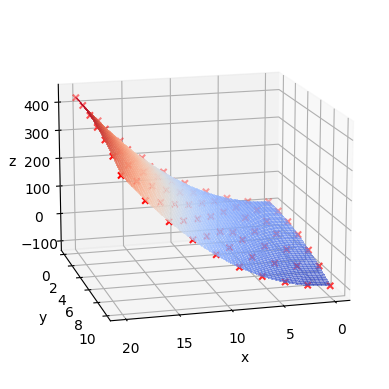

In [89]:
F = sm.add_constant(np.column_stack((x, y, x ** 2, y ** 2, x * y)))
modelres = sm.OLS(z, F).fit()
print(modelres.summary(xname=['const', 'x', 'y', 'x^2', 'y^2', 'xy']))
print('R^2', modelres.rsquared)

z1 = modelres.predict(sm.add_constant(
    np.column_stack((x1.ravel(), y1.ravel(), x1.ravel() ** 2, y1.ravel() ** 2, x1.ravel() * y1.ravel())))).reshape(
    x1.shape)

plot_3d(x, y, z, x1, y1, z1)

In [90]:
print(modelres.t_test("x2 = 0"))
print(modelres.t_test("x5 = 0"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.3672      0.468     -0.785      0.435      -1.302       0.568
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0014      0.019      0.074      0.941      -0.036       0.039


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.438e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          5.66e-109
Time:                        14:39:37   Log-Likelihood:                -180.54
No. Observations:                  70   AIC:                             369.1
Df Residuals:                      66   BIC:                             378.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6001      1.058      3.402      0.0

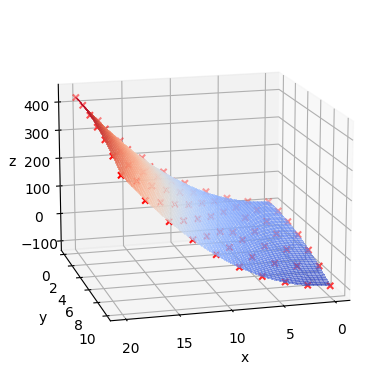

In [91]:
F = sm.add_constant(np.column_stack((x, x ** 2, y ** 2)))
modelres = sm.OLS(z, F).fit()
print(modelres.summary(xname=['const', 'x', 'x^2', 'y^2']))
print('R^2', modelres.rsquared)

z1 = modelres.predict(sm.add_constant(
    np.column_stack((x1.ravel(), x1.ravel() ** 2, y1.ravel() ** 2)))).reshape(
    x1.shape)
plot_3d(x, y, z, x1, y1, z1)

In [92]:
print(modelres.f_test("const = x1 = 0"))

<F test: F=51.68770554193782, p=3.11091337215992e-14, df_denom=66, df_num=2>


In [93]:
print(modelres.t_test("const = x1 "))  #TODO kam

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.7297      1.237      2.206      0.031       0.259       5.200
